In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/bases/bank_cli.csv')

A área de negócio, especificamente a Diretoria de Crédito do Banco Billionary, que contratou você como Cientista de Dados deseja saber:

1. Os clientes mais antigos do banco, são homens ou mulheres?
2. Dos clientes que deixaram o banco, ou seja, não possuem mais uma conta ativa e aqueles que tem, qual o impacto da variável número de produtos?
3. Os clientes que possuem maiores salário, qual a região e sexo deles? Ordena de forma CRESCENTE pelo Sobrenome do cliente Disponibilize em arquivo csv com o seguinte nome: analise_avulsa.csv

In [12]:
# 1. Os clientes mais antigos do banco, são homens ou mulheres?

# Verifica as colunas presentes no DataFrame.
print("Colunas presentes no DataFrame:")
print(df.columns)

# Exibi uma amostra dos dados para inspecionar as colunas e seus valores.
print("\nAmostra dos dados:")
print(df.head())

Colunas presentes no DataFrame:
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Amostra dos dados:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1     

In [9]:
# 1. Os clientes mais antigos do banco, são homens ou mulheres?

cliente_mais_antigo = df.loc[df['CustomerId'].idxmin()]

# Identifica o gênero do cliente mais antigo.
genero_cliente_mais_antigo = cliente_mais_antigo['Gender']

# Conta o número de clientes mais antigos por gênero.
clientes_mais_antigos = df[df['CustomerId'] == df['CustomerId'].min()]
clientes_mais_antigos_por_genero = clientes_mais_antigos['Gender'].value_counts()

print("Gênero dos clientes mais antigos:")
print(clientes_mais_antigos_por_genero)

Gênero dos clientes mais antigos:
Female    1
Name: Gender, dtype: int64


Estatísticas descritivas para clientes que deixaram o banco:
count    2037.000000
mean        1.475209
std         0.801521
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: NumOfProducts, dtype: float64

Estatísticas descritivas para clientes ativos:
count    7963.000000
mean        1.544267
std         0.509536
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: NumOfProducts, dtype: float64


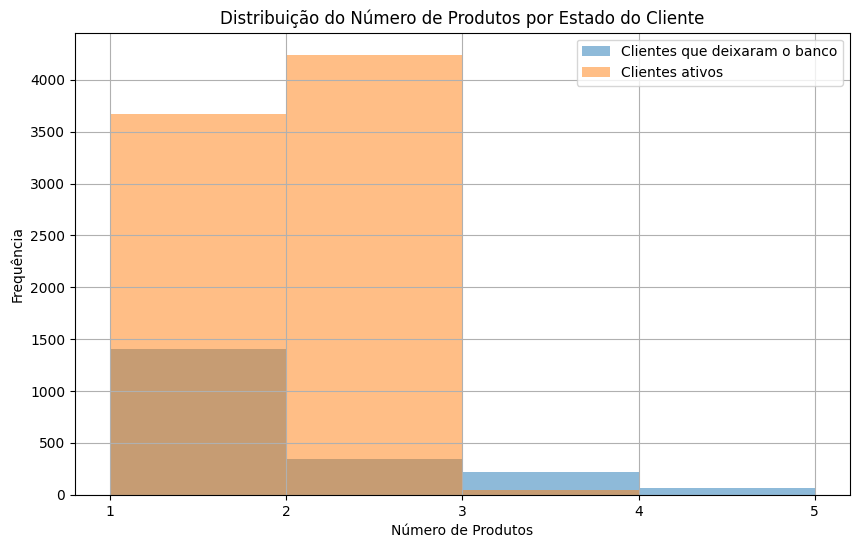

In [11]:
# 2. Dos clientes que deixaram o banco, ou seja, não possuem mais uma conta ativa e aqueles que tem, qual o impacto da variável número de
# produtos?

# Separa o DataFrame em dois grupos: clientes que deixaram o banco e clientes ativos.
clientes_exited = df[df['Exited'] == 1]
clientes_ativos = df[df['Exited'] == 0]

# Calcula estatísticas descritivas para o número de produtos de cada grupo.
stats_exited = clientes_exited['NumOfProducts'].describe()
stats_ativos = clientes_ativos['NumOfProducts'].describe()

print("Estatísticas descritivas para clientes que deixaram o banco:")
print(stats_exited)
print("\nEstatísticas descritivas para clientes ativos:")
print(stats_ativos)

# Compara as distribuições visualmente usando um histograma.
plt.figure(figsize=(10, 6))
plt.hist(clientes_exited['NumOfProducts'], bins=range(1, 6), alpha=0.5, label='Clientes que deixaram o banco')
plt.hist(clientes_ativos['NumOfProducts'], bins=range(1, 6), alpha=0.5, label='Clientes ativos')
plt.xlabel('Número de Produtos')
plt.ylabel('Frequência')
plt.title('Distribuição do Número de Produtos por Estado do Cliente')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# 3. Os clientes que possuem maiores salário, qual a região e sexo deles? Ordena de forma CRESCENTE pelo Sobrenome do cliente Disponibilize
# em arquivo csv com o seguinte nome: analise_avulsa.csv

# Identifica os clientes com os maiores salários.
maiores_salarios = df[df['EstimatedSalary'] == df['EstimatedSalary'].max()]

# Para esses clientes, determinaa a região e o sexo.
analise_avulsa = maiores_salarios[['Surname', 'Geography', 'Gender']]

# Ordena os resultados em ordem crescente pelo sobrenome do cliente.
analise_avulsa_sorted = analise_avulsa.sort_values(by='Surname')

# Salva os resultados em um arquivo CSV.
analise_avulsa_sorted.to_csv('/content/analise_avulsa.csv', index=False)

print("Análise avulsa salva com sucesso em 'analise_avulsa.csv'.")

Análise avulsa salva com sucesso em 'analise_avulsa.csv'.
